# Data Analysis

**Name : Marchelly Gideon Tambunan**

#### **DATASET AND TABLEAU LINKS**

- [DATASET](https://www.kaggle.com/datasets/sadiqshah/bike-sales-in-europe)
- [TABLEAU](https://public.tableau.com/shared/YH9Y7D59W?:display_count=n&:origin=viz_share_link)

### BACKGROUND

Bike is one of the healthiest transportation in the world. Many benefit we got from bike, at least this vechicle isn't produce pollution. Thats the reason why i want to analyze the data we got from <mark>Let's Go Green</mark>. This shop is selling anything that we need like accsesories, bikes, and clothing. This shop also sent their stuff to another country like US, UK, Australia, France, Germany, Canada. That's why i want to know some insight from the data. The store give me some question to develop our bussiness department. Let's we answer the question by some insight that we give to them.

### PROBLEM STATEMENT

`Finding healthiest Country from each age group between 2011 to 2016`

### ELABORATION POINTS

- What is the the most wanted Sub Category based on sub Order Quantity?
- Which Age Group is the most make store Rich?
- When is the time in year that give highest income?
- Which Customer is buy bikes based on Country?
- (DESCRIPTIVE)Based on Age with the highest number of Order. How does the Order_Quantity Value distribute across the year?
- (INFERENTIAL)How does that particular Age Order compare to the whole Age Order?

## WORKING AREA

### Data Loading

Importing libraries needed for our analysis

In [19]:
import pandas as pd             # import library yang dipakai
import numpy as np
from numpy import percentile
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


Reading our dataset into this project, and assigning a variable to it (df).

In [20]:
df = pd.read_csv('C:\H8_project\milestone\h8dsft_Milestone1_Marchelly_Gideon.csv',na_values=[" ", "-", "?" ,"n/a", "na", "--"])

#### DATA OVERVIEW

**In this section, we are going to do some simple data explorations, to understand our data better**

Seeing how much rows and columns our data consists of:

In [21]:
df.shape

(113036, 18)

We have a total of `113036 Rows` and `18 Columns`

Taking a glimpse peek at what our data looks like.

In [22]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [23]:
df.tail()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260
113035,2016-03-04,4,March,2016,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",23,24,64,655,552,1207


Checking descriptive values using .info() :

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

#### DATA CLEANING

This section is used to confirm that our data is clean and structured so we can understand our dataframe

At first, we want to know if there is has missing value or not

In [25]:
df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

there is no missing value on the data

then, we want to create new column named Logistic that counts sending cost in each order

In [26]:
df['Logistic']=df['Order_Quantity']*df['Unit_Price']-df['Revenue']
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Logistic
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,10
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,10
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,359
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,312
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,62


We are going to see how many Products there is in our dataframe:

In [27]:
df['State'].unique()

array(['British Columbia', 'New South Wales', 'Victoria', 'Oregon',
       'California', 'Saarland', 'Seine Saint Denis', 'Moselle',
       'Queensland', 'England', 'Nord', 'Washington', 'Hessen',
       'Nordrhein-Westfalen', 'Hamburg', 'Loir et Cher', 'Kentucky',
       'Seine (Paris)', 'South Australia', 'Loiret', 'Alberta', 'Bayern',
       'Hauts de Seine', 'Yveline', 'Essonne', "Val d'Oise", 'Tasmania',
       'Seine et Marne', 'Val de Marne', 'Pas de Calais',
       'Charente-Maritime', 'Garonne (Haute)', 'Brandenburg', 'Texas',
       'New York', 'Florida', 'Somme', 'Illinois', 'South Carolina',
       'North Carolina', 'Georgia', 'Virginia', 'Ohio', 'Ontario',
       'Wyoming', 'Missouri', 'Montana', 'Utah', 'Minnesota',
       'Mississippi', 'Massachusetts', 'Arizona', 'Alabama'], dtype=object)

Cause we have `130` different products, we have to pursed it by sub Category.

In [28]:
df['Sub_Category'].nunique()

17

Great, we have `17` Sub Category. But, What are those Sub Category. Let's see

In [29]:
df['Sub_Category'].value_counts()

Tires and Tubes      33870
Bottles and Cages    15876
Road Bikes           13430
Helmets              12158
Mountain Bikes        8854
Jerseys               6010
Caps                  4358
Fenders               4032
Touring Bikes         3698
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

There is `17` Different Sub Category from our dataframe. Then, we'll see how many Transaction we have using groupby

In [30]:
df.groupby(['Product_Category', 'Sub_Category'])[['Order_Quantity']].count() #grouping data antara dropoff_site dengan load_weight

Order_Quantity
Product_Category Sub_Category                     
Accessories      Bike Racks                    592
                 Bike Stands                   456
                 Bottles and Cages           15876
                 Cleaners                     1802
                 Fenders                      4032
                 Helmets                     12158
                 Hydration Packs              1334
                 Tires and Tubes             33870
Bikes            Mountain Bikes               8854
                 Road Bikes                  13430
                 Touring Bikes                3698
Clothing         Caps                         4358
                 Gloves                       2686
                 Jerseys                      6010
                 Shorts                       1794
                 Socks                        1122
                 Vests                         964

After that, we want to see how much Product sale from Sub Category using groupby.

In [31]:
df.groupby(['Product_Category', 'Sub_Category'])[['Order_Quantity']].sum() #grouping data antara dropoff_site dengan load_weight

Order_Quantity
Product_Category Sub_Category                     
Accessories      Bike Racks                   4741
                 Bike Stands                  2412
                 Bottles and Cages          241726
                 Cleaners                    27574
                 Fenders                     62138
                 Helmets                    181606
                 Hydration Packs             19914
                 Tires and Tubes            514051
Bikes            Mountain Bikes              11992
                 Road Bikes                  19771
                 Touring Bikes                4648
Clothing         Caps                        67268
                 Gloves                      39978
                 Jerseys                     88125
                 Shorts                      27168
                 Socks                       17678
                 Vests                       14526

Then we want to find out the date that this dataframe is recorded:

In [32]:
df['Date'].min()

'2011-01-01'

In [33]:
df['Date'].max()

'2016-07-31'

As you can see, the dataframe is recorded From 2011 to 2016. That's mean our data is recorded in 5 years.

`Let's go to the next section!`

#### ELABORATION POINTS 1

- **what is the the most wanted Sub Category based on sub Order Quantity?**

First we have to groupping the dataframe between Sub Category and Order Quantity

In [34]:
df_order = df.groupby(df['Sub_Category']).sum()['Order_Quantity'].sort_values(ascending = False)
df_order

Sub_Category
Tires and Tubes      514051
Bottles and Cages    241726
Helmets              181606
Jerseys               88125
Caps                  67268
Fenders               62138
Gloves                39978
Cleaners              27574
Shorts                27168
Hydration Packs       19914
Road Bikes            19771
Socks                 17678
Vests                 14526
Mountain Bikes        11992
Bike Racks             4741
Touring Bikes          4648
Bike Stands            2412
Name: Order_Quantity, dtype: int64

As we can see, Tiers and Tubes are the most wanted Sub Category Products with total order `514.051`

<AxesSubplot:title={'center':'Most wanted Sub Category Product'}, ylabel='Sub_Category'>

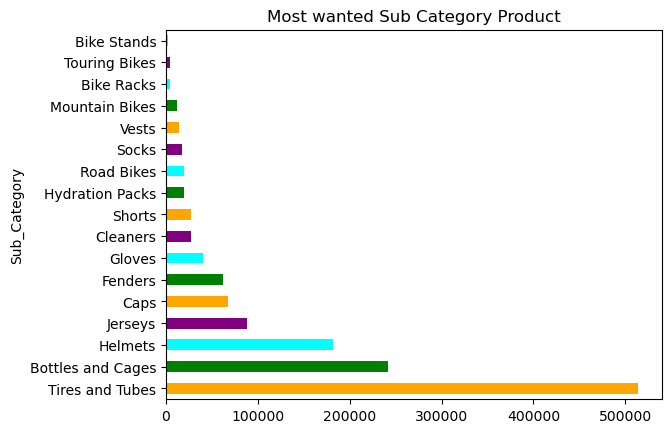

In [38]:
df_order.plot(kind='barh', xlabel = 'Sub_Category', ylabel = 'Sub_Category', title = 'Most wanted Sub Category Product', color = ['orange','green', 'cyan','purple'])

After we plot our grouped brand and users, we can see clearer that `Tires and Tubes` has a `far higher advantages` than the others.

#### ELABORATION POINTS 2
- **which Age Group is the most make store Rich?**

Now we want to see the state that give profit to the store using groupby

In [ ]:
df_cat = df.groupby(df['Age_Group']).sum()['Order_Quantity'].sort_values(ascending = False)
df_cat

Age_Group
Adults (35-64)          672417
Young Adults (25-34)    446875
Youth (<25)             216147
Seniors (64+)             9877
Name: Order_Quantity, dtype: int64

<AxesSubplot:title={'center':'Most Wanted Sub Category Product based on Age Group'}, xlabel='Age_Group', ylabel='Order Quantity'>

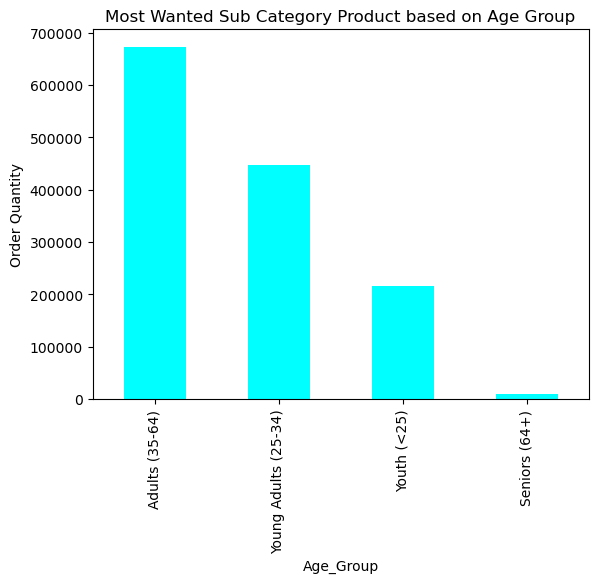

In [ ]:
df_cat.plot(kind='bar', xlabel = 'Age_Group', ylabel = 'Order Quantity', title = 'Most Wanted Sub Category Product based on Age Group', color = 'cyan')

Here it is. California is the best state that make store rich which means That state gives us `77.72.869` USD 

#### ELABORATION POINTS 3
- **when is the time in year that give highest income?**

For answer this question, we want to goupping year and profit first.

In [ ]:
df_rev = df.groupby(df['Year'])['Profit'].sum()
df_rev

Year
2011    2881301
2012    2951993
2013    5959208
2014    5864087
2015    7528563
2016    7035948
Name: Profit, dtype: int64

<AxesSubplot:title={'center':'Profit Based on Year'}, xlabel='Year', ylabel='Profit'>

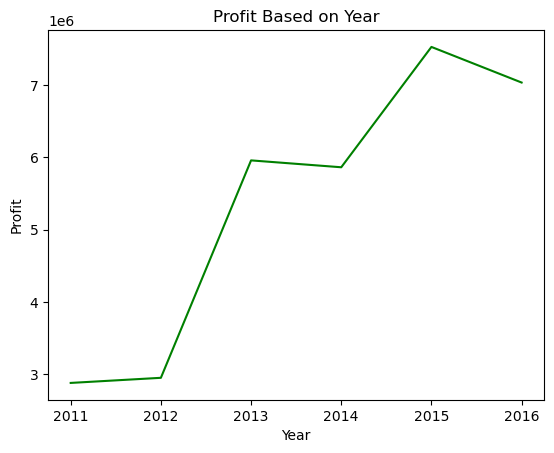

In [ ]:
df_rev.plot(kind='line', xlabel = 'Year', ylabel = 'Profit', title = 'Profit Based on Year', color = ('green'))

as we can see that 2016 is the highest Profit of all time with total profit `7.528.563` USD

#### ELABORATION POINTS 4

- **Which Customer is buy bikes based on Country?**

In [ ]:
df_country = df[df['Product_Category']=='Bikes'][['Country','Order_Quantity']].groupby('Country').sum()
df_country

,Order_Quantity
Country,
Australia,10156
Canada,2245
France,3812
Germany,4173
United Kingdom,4833
United States,11192


we can see that Adults in the biggest value than the other. than we want to know total products order from the adults.

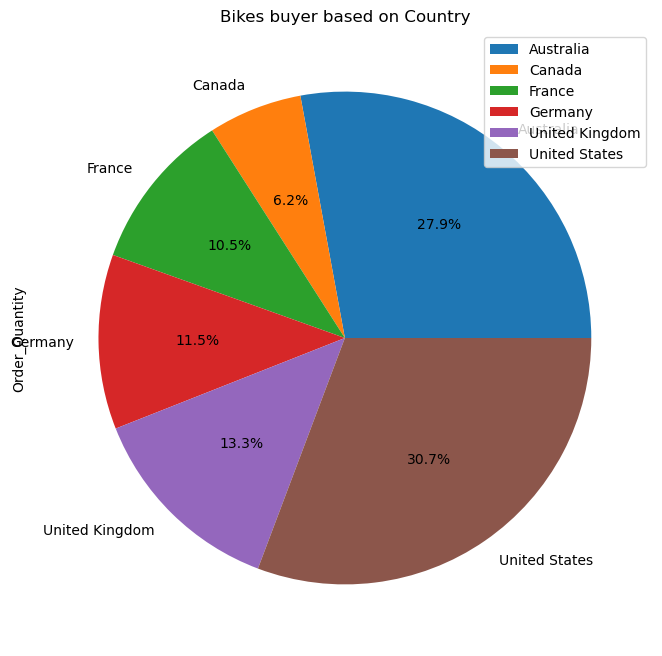

In [ ]:
df_country.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(14, 8))
plt.title("Bikes buyer based on Country")
plt.legend()
plt.show()

So from the buyer bikes based on Country, we have some pretty interesting insight:
- US is the most bikers than the other Age.
- Canada is the lowest country that just 6,2% people who buy bikes than other countries 
- US and Australia had no significant different than the other country.

#### ELABORATION POINTS 5 (DESCRIPTIVE STATISTICS)

- **Based on Age with the highest number of Order. How does the Order_Quantity Value distribute across the year?**

Since the most buyer came from adult, we'll find out the distribution from `Adults` Order we chose. first we group the age and sorting by the highest order.

In [ ]:
df_desc = df[(df['Age_Group']=='Adults (35-64)')].sort_values('Order_Quantity', ascending = False)
df_desc

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Logistic
3213,2015-11-27,27,November,2015,40,Adults (35-64),M,United Kingdom,England,Accessories,Bottles and Cages,Water Bottle - 30 oz.,32,2,5,90,64,154,6
11530,2016-05-24,24,May,2016,44,Adults (35-64),F,United States,California,Accessories,Bottles and Cages,Water Bottle - 30 oz.,32,2,5,93,64,157,3
95315,2016-01-13,13,January,2016,37,Adults (35-64),F,United States,California,Accessories,Tires and Tubes,Mountain Tire Tube,32,2,5,93,64,157,3
39789,2015-12-15,15,December,2015,36,Adults (35-64),M,United States,Washington,Accessories,Helmets,"Sport-100 Helmet, Black",32,13,35,458,416,874,246
37725,2016-04-15,15,April,2016,49,Adults (35-64),F,United States,California,Accessories,Helmets,"Sport-100 Helmet, Blue",32,13,35,682,416,1098,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63514,2013-08-09,9,August,2013,38,Adults (35-64),M,France,Seine (Paris),Bikes,Road Bikes,"Road-350-W Yellow, 42",1,1083,1701,312,1083,1395,306
63516,2014-06-27,27,June,2014,38,Adults (35-64),M,France,Seine (Paris),Bikes,Road Bikes,"Road-650 Red, 62",1,487,783,155,487,642,141
63648,2013-09-16,16,September,2013,35,Adults (35-64),M,Germany,Nordrhein-Westfalen,Bikes,Road Bikes,"Road-650 Black, 52",1,487,783,194,487,681,102
63649,2015-09-16,16,September,2015,35,Adults (35-64),M,Germany,Nordrhein-Westfalen,Bikes,Road Bikes,"Road-650 Black, 52",1,487,783,194,487,681,102


From here we want to find our central tendency to measure the distribution of order within the `Adults` age

In [ ]:
print('Mean :', df_desc['Order_Quantity'].mean())
print('Median :', df_desc['Order_Quantity'].median())
print('Mode :', df_desc['Order_Quantity'].mode()[0])
print('Minimum :', df_desc['Order_Quantity'].min())
print('Max :', df_desc['Order_Quantity'].max())
print('Standard Deviation :', df_desc['Order_Quantity'].std())

Mean : 12.04530309544282
Median : 11.0
Mode : 1
Minimum : 1
Max : 32
Standard Deviation : 9.58839265346215


The ranges within Order in `Adults` varies between 1 to 32, so we have a broad variation of ratings within this age (Highest to Lowest). And we also have a pretty high standard deviation which is 9,588 with the average of 12,045. We have similar values in median (`11`). With the mode at maximum (`32`). This means that our data is skewed moderately. So to ensure we used the `.skew()` function :

In [ ]:
df_desc['Order_Quantity'].skew()

0.3559545039226505

We can conclude that this data is fairly skewed. But for our analysis purposes, the data is fine for us to use because we need all the data within the `Marlboro` Brand for our next analysis.

#### ELABORATION POINTS 6 (INFERENTIAL STATISTICS)

- **How does that particular Age Order compare to the whole Age Order?**

From our previous analysis in the Adults Age distribution in `Elaboration Point 5`, in this section we want to know how does the average Order in this Age compare to the whole average order in our dataframe. For that purpose we must perform a hypothesis testing using `ANOVA`

So as we can see below we used the t - test 2 sample 2 tailed with the declaration as follows :

- H0 : &mu; Adults = &mu; Young = &mu; Young Adult = &mu; Senior

- H1 : &mu; Adults != &mu; Young != &mu; Young Adult != &mu; Senior

In [ ]:
df.groupby('Age_Group')['Profit'].mean()

Age_Group
Adults (35-64)          292.375717
Seniors (64+)           189.267123
Young Adults (25-34)    294.581699
Youth (<25)             245.377608
Name: Profit, dtype: float64

In [ ]:
young = df[df.Age_Group == 'Youth (<25)'].groupby('Date').sum()['Profit']
adult = df[df.Age_Group == 'Adults (35-64)'].groupby('Date').sum()['Profit']
young_adult = df[df.Age_Group == 'Young Adults (25-34)'].groupby('Date').sum()['Profit']
senior = df[df.Age_Group == 'Seniors (64+)'].groupby('Date').sum()['Profit']

print("young",young.mean())
print("adult",adult.mean())
print("young adult",young_adult.mean())
print("senior",senior.mean())

young 2851.754889178618
adult 8832.024891774892
young adult 6249.5944017563115
senior 500.5978260869565


In [ ]:
f_stat,p_value = stats.f_oneway(young,adult,young_adult, senior) 
print('P-value:',p_value)

P-value: 5.5712170764622e-230


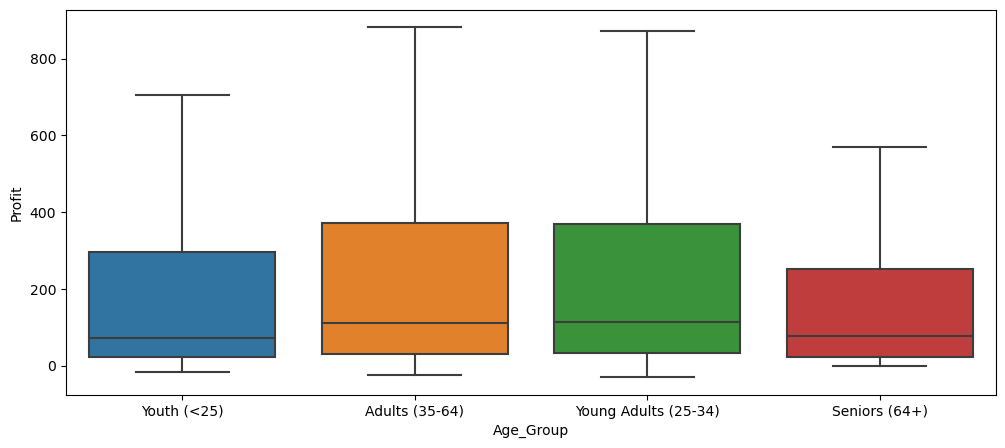

In [ ]:
plt.figure(figsize=[12,5])

# Plotting column from data frame
sns.boxplot(data=df, x='Age_Group' , y=('Profit'),showfliers=False)
plt.title('')
plt.show()

Then we compared the Order in Adults with the whole dataframe :

Here we plot our ANOVA with us generating random numbers so we can predict the value of our future data given the random numbers we generated based on our data from the two dataframes.

From the results of our p-value we can conclude on the given data that our hypothesis is we reject the H0 which means that the average Profit of `Adults` age is not the same as `The whole Age `, or in simplifier there is a `Significant Difference` between the average order of `Adults` and the average order of the `Whole Age order`.

## CONCLUSIONS BASED ON ANALYSIS

From our data analysis we elaborate from above, we can conclude that :
- There are 17 different Sub Category of Products in this whole dataframe in the last 6 years within 2011 - 2016, with `Tires and Tubes` sub category that the most wanted with a total of 514.051 orders the `Tires and Tubes` Sub Category, followed by `Bottle and Cages` with 241.726 total Order and `Bike Stands` Sub Category who has been ordered by only 2.412 order.
- Based on the Age from order, we can see the `Adults` Age Group has the highest Order in total which means that Adults is the highest order than the others. followed `young adults` with  446.875 order.
- From what we can see from our total and plot, `2015` is the most year that gained highest profit with a total 7.528.563 USD. sadly in `2016`, we must gain lower than that with gain 7.035.948 USD. But, it still the another highest than the other time.
- From the `Elaboration Point 4`, we could conclude that Country has a key role in deciding the final results of profit, that's why the `US` order points (**11.192 Total order**) has the highest order. In the other hand the lowest order on order which is from `Cana` (**2.245 Total order**) means that the product thats just 6,2% from our total product sales of all time.
- We chose `Adults` as the our focus because it has a high number of orders with various ages and if we compare `Adults` to the whole dataframe, we still have a quite **good total order**. as we can see on a boxplot, we conclude that adults is the highest profit to our store
- From our testing in finding a relation in the total order of adults  with the total order on the whole age we figured out that our H0 hypothesis is rejected. Which means that the total order on our `Adults` age is not the same as the total order in the whole age of our dataframe.